In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import klib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_train= pd.read_csv(r'C:\Users\A.sri lakshmi devi\Desktop\bigmart datasets\Train.csv')
df_test= pd.read_csv(r'C:\Users\A.sri lakshmi devi\Desktop\bigmart datasets\Test.csv')

In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
#checking for null values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#----- FILLING ITEM_WEIGHT  MISSING VALUES---#

df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [8]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [9]:
df_train.isnull().sum()  #checking after filling missing values , there is any missing values of item weight

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#Outlet_Size is catagorical column so we fill it with Mode Imputation
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [12]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [13]:
df_train.isnull().sum()           #checking after filling missing values , there is any missing values of outletsize


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
#   FETAURE SELECTION OR DIMENSIONALITY REDUCTION
#HERE IAM DROPING Item_Identifier,Outlet_Identifier   
#BECAUSE YOUR ROLL NUMBERS DOESNT EFFECT YOUR MARKS LIKE THAT..........

In [15]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [16]:
df_train #checking there are gone or not

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
pip install -U klib

In [20]:
pip install pandas-profiling


     ---------------------------------------- 0.0/324.4 kB ? eta -:--:--
     --- ------------------------------------ 30.7/324.4 kB ? eta -:--:--
     --- ------------------------------------ 30.7/324.4 kB ? eta -:--:--
     --- ------------------------------------ 30.7/324.4 kB ? eta -:--:--
     ---- -------------------------------- 41.0/324.4 kB 217.9 kB/s eta 0:00:02
     ---- -------------------------------- 41.0/324.4 kB 217.9 kB/s eta 0:00:02
     ---- -------------------------------- 41.0/324.4 kB 217.9 kB/s eta 0:00:02
     ---- -------------------------------- 41.0/324.4 kB 217.9 kB/s eta 0:00:02
     ---- -------------------------------- 41.0/324.4 kB 217.9 kB/s eta 0:00:02
     ------------ ----------------------- 112.6/324.4 kB 242.7 kB/s eta 0:00:01
     ------------ ----------------------- 112.6/324.4 kB 242.7 kB/s eta 0:00:01
     ------------- ---------------------- 122.9/324.4 kB 218.3 kB/s eta 0:00:01
     ------------- ---------------------- 122.9/324.4 kB 218.3 k

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python310\\Lib\\site-packages\\~atplotlib.libs\\msvcp140-e78ebc24b6ffa690be9375aacad743a7.dll'
Consider using the `--user` option or check the permissions.




     ------------------------- -------------- 5.8/9.1 MB 52.4 kB/s eta 0:01:05
     ------------------------- -------------- 5.8/9.1 MB 52.4 kB/s eta 0:01:05
     ------------------------- -------------- 5.8/9.1 MB 52.4 kB/s eta 0:01:05
     ------------------------- -------------- 5.8/9.1 MB 53.4 kB/s eta 0:01:03
     ------------------------- -------------- 5.8/9.1 MB 53.4 kB/s eta 0:01:03
     ------------------------- -------------- 5.8/9.1 MB 53.4 kB/s eta 0:01:03
     ------------------------- -------------- 5.8/9.1 MB 53.4 kB/s eta 0:01:03
     ------------------------- -------------- 5.8/9.1 MB 53.4 kB/s eta 0:01:03
     ------------------------- -------------- 5.8/9.1 MB 53.4 kB/s eta 0:01:03
     ------------------------- -------------- 5.8/9.1 MB 53.4 kB/s eta 0:01:03
     ------------------------- -------------- 5.8/9.1 MB 53.4 kB/s eta 0:01:03
     ------------------------- -------------- 5.8/9.1 MB 53.4 kB/s eta 0:01:03
     ------------------------- -------------- 5.8/9

In [22]:
pip install pandas-profiling



  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached phik-0.12.3-cp310-cp310-win_amd64.whl (663 kB)
  Using cached statsmodels-0.13.5-cp310-cp310-win_amd64.whl (9.1 MB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)


In [23]:
import pandas as pd
from pandas_profiling import ProfileReport

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\A.sri lakshmi devi\AppData\Local\Temp\ipykernel_10588\3034448462.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [25]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [27]:
pip install ipywidgets


     ---------------------------------------- 0.0/138.3 kB ? eta -:--:--
     -------- ---------------------------- 30.7/138.3 kB 640.0 kB/s eta 0:00:01
     ---------- -------------------------- 41.0/138.3 kB 388.9 kB/s eta 0:00:01
     ------------------------ ------------ 92.2/138.3 kB 744.7 kB/s eta 0:00:01
     ---------------------------------- - 133.1/138.3 kB 653.6 kB/s eta 0:00:01
     ------------------------------------ 138.3/138.3 kB 627.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/198.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/198.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/198.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/198.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/198.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/198.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/198.2 kB ? eta -:--:--
     -- --

In [28]:
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


In [29]:
# EDA USING KLIB LIBRARY
import klib
import pandas as pd

GridSpec(6, 5)

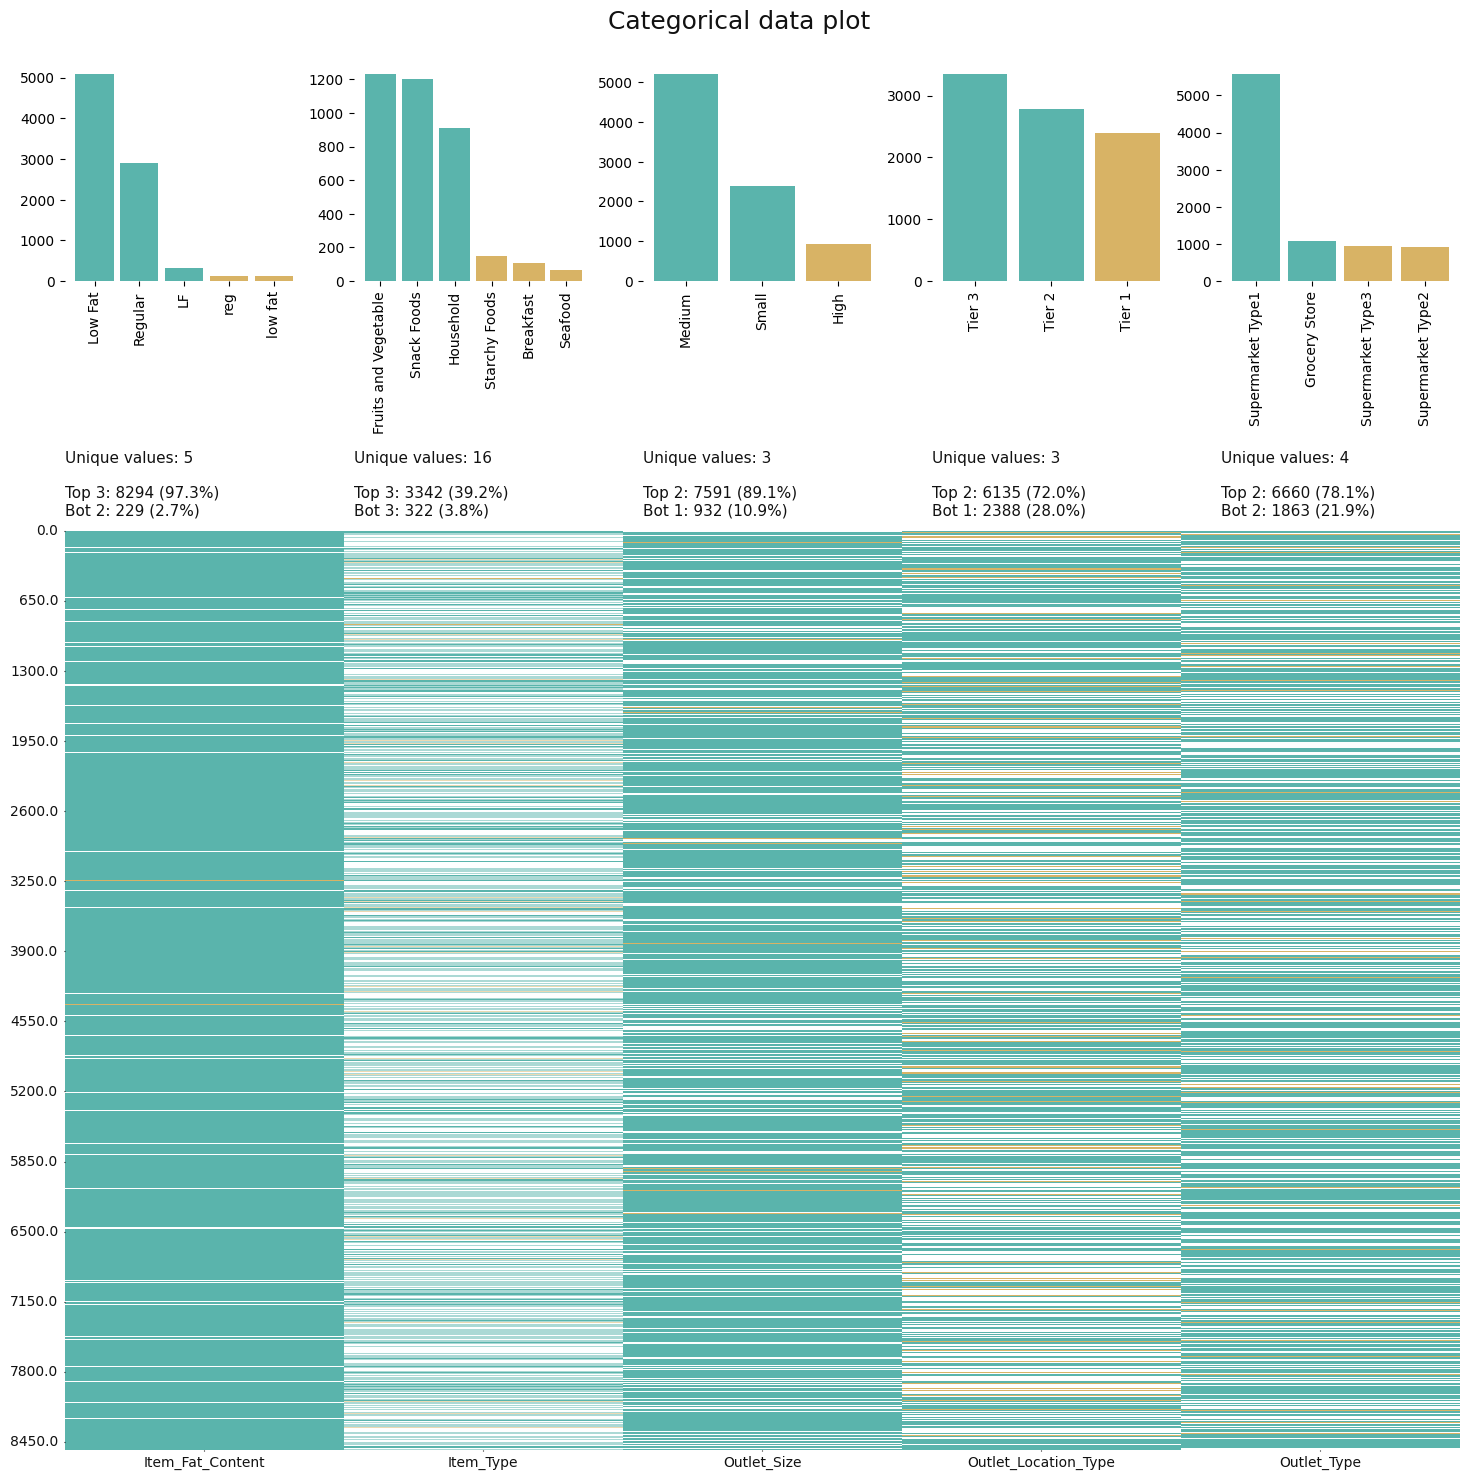

In [30]:
# klib.describe - functions for visualizing datasets
 # returns a visualization of the number and frequency of categorical features
klib.cat_plot(df_train)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

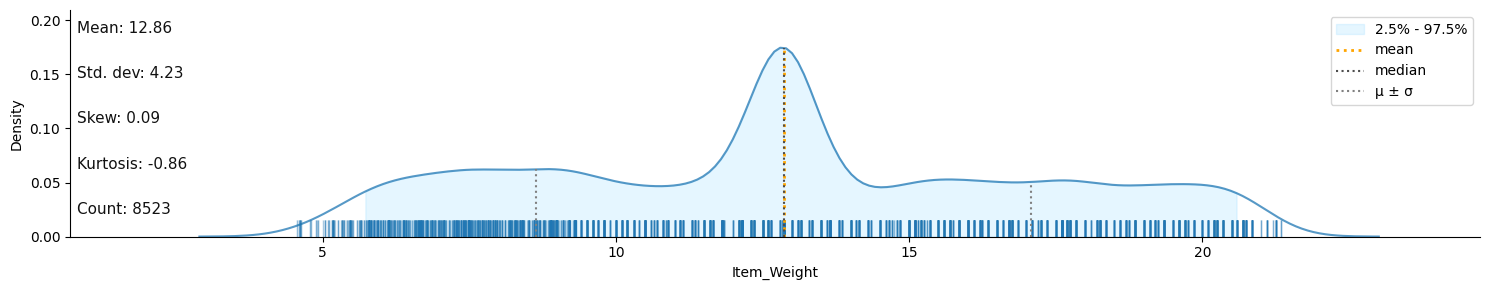

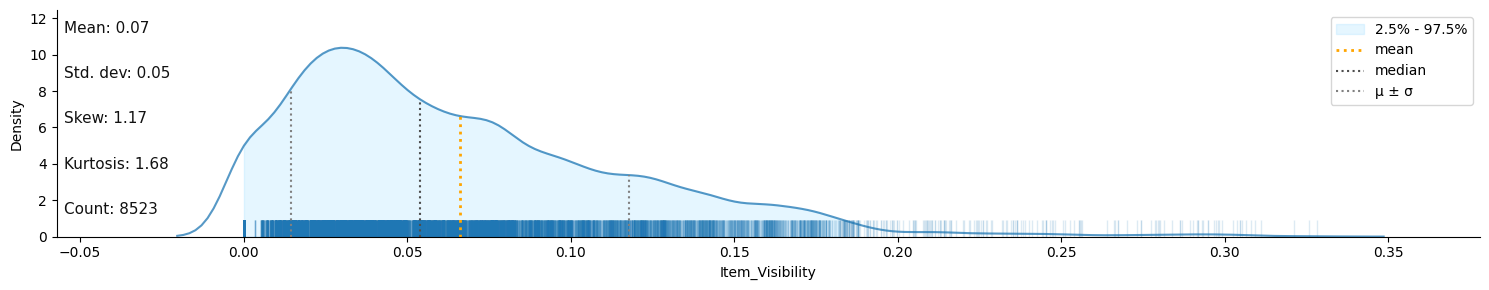

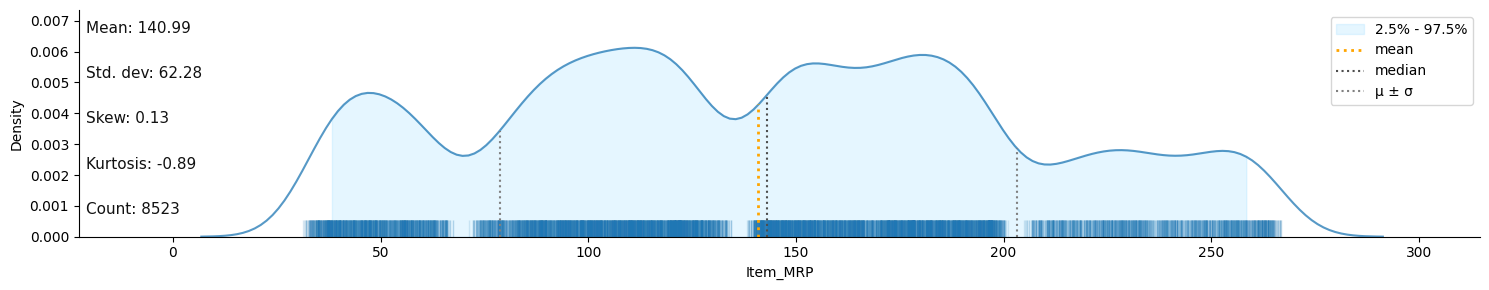

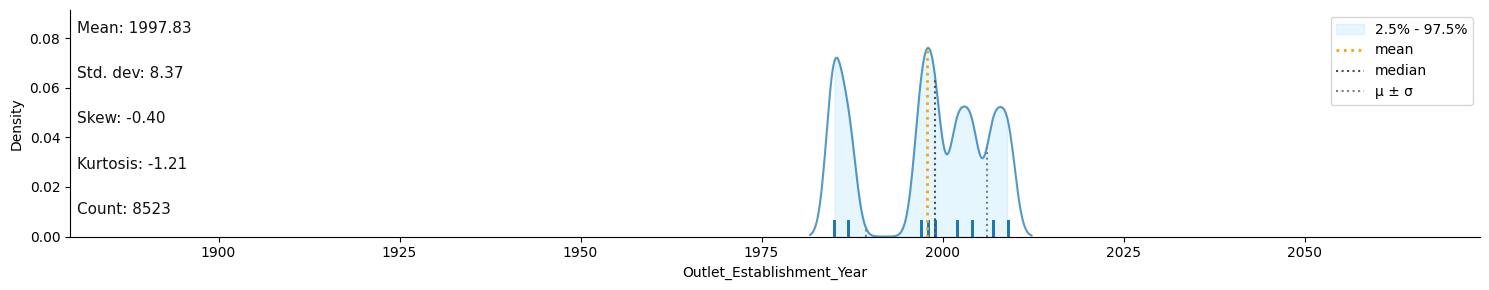

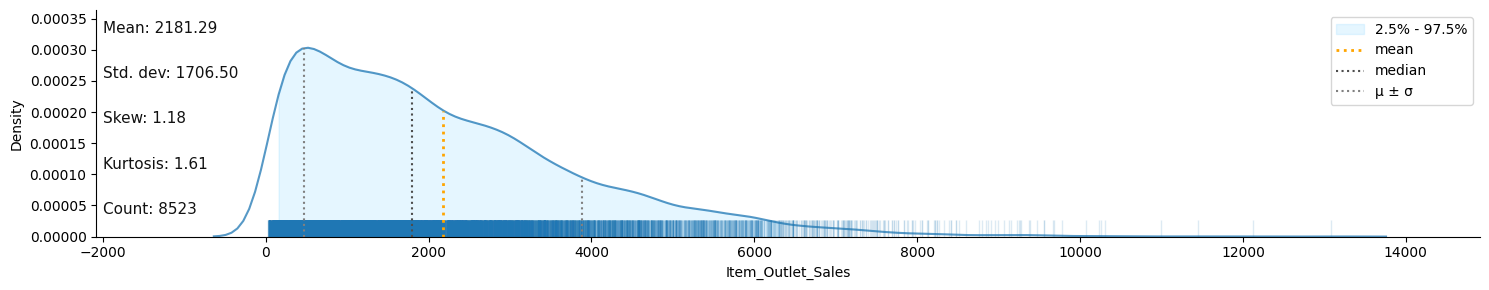

In [31]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature

No missing values found in the dataset.


GridSpec(6, 6)

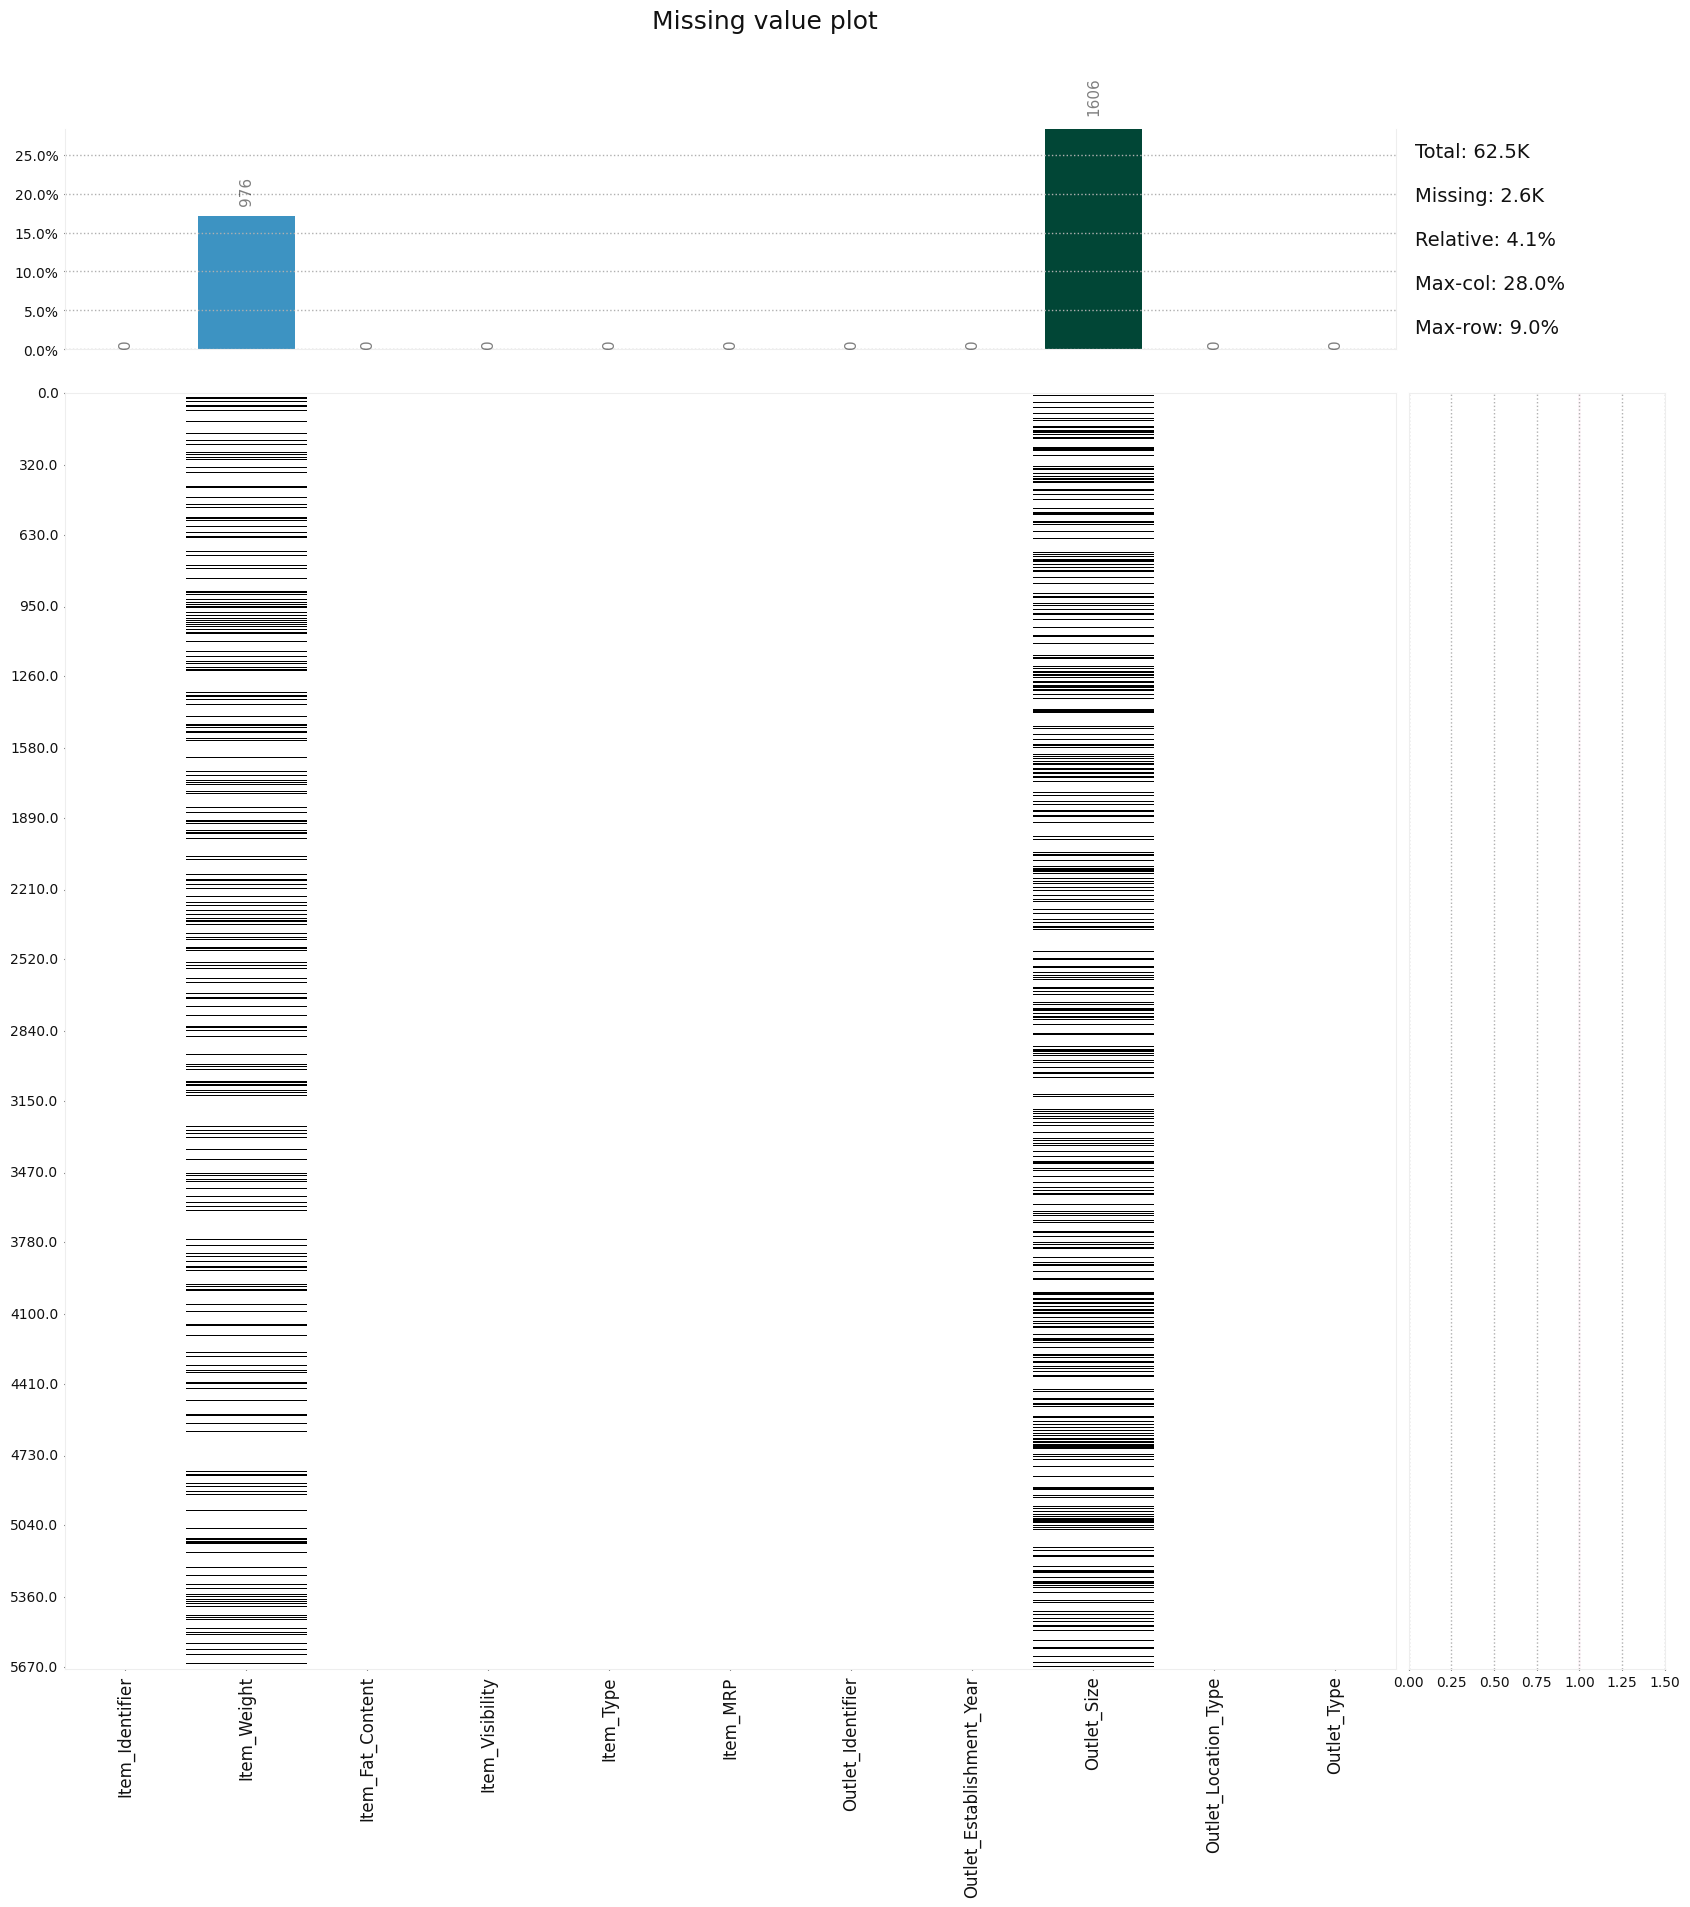

In [32]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values
klib.missingval_plot(df_test) # returns a figure containing information about missing values

In [33]:
#Data Cleaning using Klib Library
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(df_test)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)

Shape of cleaned data: (5681, 11) - Remaining NAs: 2582


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.33 MB (-68.75%)



,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.862198,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.319801,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.753799,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.033997,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.229996,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.315399,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.144806,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.744003,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.621796,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [34]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()
klib.clean_column_names(df_train) 

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [36]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [37]:
klib.mv_col_handling(df_train) # drops features with high ratio of missing vals based on informational content


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [ ]:

#under preprocessing 
#1.label encoding  2.Normalization 3. partitioning 

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:

df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [40]:
df_train.head() #checking

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200


In [ ]:
2) Splitting our data into train and test (paetitioning)

In [41]:
X=df_train.drop('item_outlet_sales',axis=1)   #creating x,y values x is input now,and y is  target

In [42]:
Y=df_train['item_outlet_sales']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [44]:
 X_test

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.000000,1,0.055163,8,100.335800,2009,1,2,2
8355,18.000000,1,0.038979,13,148.641800,1987,0,2,1
3411,7.720000,2,0.074731,1,77.598602,1997,2,0,1
7089,20.700001,1,0.049035,6,39.950600,2007,1,1,1
6954,7.550000,1,0.027225,3,152.934006,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
1317,16.750000,1,0.105019,13,155.263000,1999,1,0,1
4996,8.520000,1,0.027059,14,153.368195,1997,2,0,1
531,15.600000,1,0.111686,11,184.792404,1998,1,2,0
3891,17.100000,1,0.000000,9,114.685997,2009,1,2,2


In [45]:
 Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [46]:
X_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
3684,19.250000,1,0.101689,4,54.695599,1987,0,2,1
1935,7.630000,1,0.061410,14,94.643600,2007,1,1,1
5142,19.350000,2,0.065891,10,167.081604,2007,1,1,1
4978,6.380000,0,0.031898,4,177.434402,1997,2,0,1
2299,16.700001,1,0.022110,4,110.888603,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
599,5.000000,1,0.044005,14,188.852997,1997,2,0,1
5695,14.650000,1,0.170664,7,56.461399,2002,1,1,1
8006,12.500000,1,0.018849,8,96.738403,1997,2,0,1
1361,9.695000,2,0.129009,0,226.940399,2007,1,1,1


In [47]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [ ]:
3) Standarization(normalization)

In [48]:
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,1.369354,0.066132,7.226681,140.992767,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.644810,0.051598,4.209990,62.275066,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012802,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888397,2009.000000,2.000000,2.000000,3.000000


In [49]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [50]:
X_train_std= sc.fit_transform(X_train)


In [51]:
X_test_std= sc.transform(X_test)


In [52]:
X_train_std

array([[ 1.52290023, -0.57382672,  0.68469731, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.239856  , -0.57382672, -0.09514746, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667619,  0.97378032, -0.0083859 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.57382672, -0.91916229, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888436,  0.97378032,  1.21363045, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.57382672,  1.83915361, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [53]:
X_test_std

array([[-0.43860916, -0.57382672, -0.21609253, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570184, -0.57382672, -0.52943464, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.2184578 ,  0.97378032,  0.16277341, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508101, -0.57382672,  0.8782423 , ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171909, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558541,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [54]:

Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [55]:
import joblib
joblib.dump(sc,r'C:\Users\A.sri lakshmi devi\Desktop\bigmart datasets\model\sc.sav')

['C:\\Users\\A.sri lakshmi devi\\Desktop\\bigmart datasets\\model\\sc.sav']

In [56]:

##############  Model Building  #######
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [57]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [58]:
lr.predict(X_test_std)

array([2046.00728016, 2130.35742269, 1207.94498753, ..., 1279.28266863,
       2360.54639912, 2351.11205438])

In [59]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [60]:
 X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.000000,1,0.055163,8,100.335800,2009,1,2,2
8355,18.000000,1,0.038979,13,148.641800,1987,0,2,1
3411,7.720000,2,0.074731,1,77.598602,1997,2,0,1
7089,20.700001,1,0.049035,6,39.950600,2007,1,1,1
6954,7.550000,1,0.027225,3,152.934006,2002,1,1,1


In [61]:
Y_pred_lr=lr.predict(X_test_std)

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [63]:
print(Y_pred_lr)
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))


[2046.00728016 2130.35742269 1207.94498753 ... 1279.28266863 2360.54639912
 2351.11205438]
0.5041875773270632
880.9999044084501
1162.4412631603454


In [64]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [65]:
rf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1000)

In [68]:
Y_pred_rf= rf.predict(X_test)
print(Y_pred_rf)
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

[1683.34547208 3599.77280084 1290.93827631 ...  372.03572388 1657.69287399
 2382.04467447]
0.5484699652812131
782.67874226487
1109.3169213221097


In [69]:
#Hyper Parameter Tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.519 (0.000) with: {'n_estimators': 10}
0.544 (0.005) with: {'n_estimators': 100}
0.550 (0.006) with: {'n_estimators': 1000}


In [70]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [71]:
grid_search_forest.best_score_

0.5500488435613071

In [72]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)
r2_score(Y_test,Y_pred_rf_grid)

0.5483940616802676

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
# Train the model
gbm = GradientBoostingRegressor()
gbm.fit(X_train,Y_train)
ns=1.5
# Make predictions on the testing set
y_pred = gbm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(  Y_test, y_pred)*ns
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 1095445.2473472084
R-squared: 0.8970833144273366
